In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# load data
entity_labels = pd.read_csv("knowledge_graph/entities_labels.tsv",delimiter='\t', header=None, names=["id","name"])
property_labels = pd.read_csv("knowledge_graph/properties_labels.tsv",delimiter='\t',names=["id","name"])
triplets = pd.read_csv("knowledge_graph/India_final.tsv",delimiter='\t',header=None,names=["head","relation","tail"])


In [2]:
# drop nan rows
triplets = triplets.dropna()
entity_labels = entity_labels.dropna()
property_labels = property_labels.dropna()

In [3]:
# gender relation
gender_relation_name = "'sex or gender'"
property_labels[property_labels["name"].str.contains("gender")]

,id,name
1039,P21,'sex or gender'


In [4]:
# genders
triplets[triplets["relation"]==gender_relation_name]["tail"].unique()
male_categories = ["'male'","'male organism'"]
female_categories = ["'female'"]
transgender_categories = ["'transgender female'","'intersex'","'genderqueer'","'non-binary'", "somevalue"]

In [5]:
# find male and female entities
gender_triplets = triplets[triplets["relation"]==gender_relation_name]
male_entities = gender_triplets[gender_triplets["tail"].isin(male_categories)]["head"].values
female_entities = gender_triplets[gender_triplets["tail"].isin(female_categories)]["head"].values

In [6]:
# occupation relation
occupation_relation_name = "'occupation'"
property_labels[property_labels["name"].str.contains("occupation")]

,id,name
644,P106,'occupation'


In [7]:
# male occupation triplets and female occupation triplets
occupation_triplets = triplets[triplets["relation"]==occupation_relation_name]
male_triplets = occupation_triplets[occupation_triplets["head"].isin(male_entities)]
female_triplets = occupation_triplets[occupation_triplets["head"].isin(female_entities)]

In [8]:
# getting probabilities per occupation
male_counts = male_triplets["tail"].value_counts()
female_counts = female_triplets["tail"].value_counts()
probs = pd.DataFrame({"male":male_counts,"female":female_counts}).fillna(0)
probs["male"]/=male_triplets.shape[0]
probs["female"]/=female_triplets.shape[0]

probs["diff"] = probs["male"]-probs["female"]

In [9]:
# get gender-neutral occupation counts
def get_neutral_counts(t,probs):
    return probs[(probs["diff"]>=-t) & (probs["diff"]<=t)].shape[0]

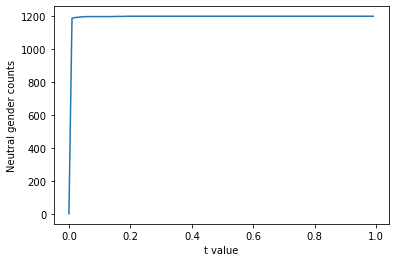

In [10]:
t_values = list(np.arange(0,1,0.01))
neutral_counts = [get_neutral_counts(t,probs) for t in t_values]

plt.plot(t_values,neutral_counts)
plt.xlabel("t value")
plt.ylabel("Neutral gender counts")
plt.show()

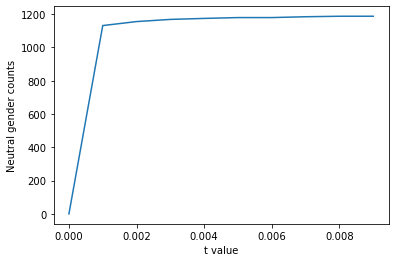

In [11]:
t_values = list(np.arange(0,0.01,0.001))
neutral_counts = [get_neutral_counts(t,probs) for t in t_values]

plt.plot(t_values,neutral_counts)
plt.xlabel("t value")
plt.ylabel("Neutral gender counts")
plt.show()

# check : checking whether there are multiple entries for entities

Gender for every entitity is unique
Occupation for an entity may not be unique

In [12]:
male_triplets["head"].value_counts().sort_values()

'Harminder Singh Gill'       1
'Indrajit Kumar'             1
'Kuna Tripathy'              1
'Budhram Laguri'             1
'Kishna Ram Vishnoi'         1
                            ..
'Manoj Kumar'               16
'Vijay Kumar'               17
'Anil Kumar'                25
'Ashok Kumar'               26
'Bhimrao Ramji Ambedkar'    33
Name: head, Length: 39905, dtype: int64

In [13]:
female_triplets["head"].value_counts().sort_values()

'Parvati Khan'        1
'Susmita Das'         1
'Preeti Shenoy'       1
'Annu Tandon'         1
'Garima Poddar'       1
                     ..
'Neena Gupta'         7
'Eunice de Souza'     7
'Hema Malini'         8
'Krishna Das'         8
'Smita Nair Jain'    13
Name: head, Length: 9313, dtype: int64

In [14]:
triplets[(triplets["head"]=="'Smita Nair Jain'") & (triplets["relation"]==occupation_relation_name)]

,head,relation,tail
141727,'Smita Nair Jain','occupation','film actor'
141728,'Smita Nair Jain','occupation','playback singer'
141729,'Smita Nair Jain','occupation','singer'
141730,'Smita Nair Jain','occupation','screenwriter'
141731,'Smita Nair Jain','occupation','actor'
141732,'Smita Nair Jain','occupation','adjunct professor'
141733,'Smita Nair Jain','occupation','writer'
141734,'Smita Nair Jain','occupation','teacher'
141735,'Smita Nair Jain','occupation','author'
141736,'Smita Nair Jain','occupation','blogger'


In [15]:
triplets[(triplets["relation"]==gender_relation_name)]["head"].value_counts().sort_values()

'Sekh Sahonawez'               1
'Alla Venkata Rama Rao'        1
'V. S. Raji'                   1
'Dina Nath Ram'                1
'Rudresh Ramanna Hadagali'     1
                              ..
'Ajit Singh'                  16
'Ram Singh'                   16
'Vijay Kumar'                 19
'Ashok Kumar'                 21
'Anil Kumar'                  28
Name: head, Length: 54280, dtype: int64

In [16]:
triplets[(triplets["relation"]==gender_relation_name) & (triplets["head"]=="'Ashok Kumar'")]

,head,relation,tail
94872,'Ashok Kumar','sex or gender','male'
168700,'Ashok Kumar','sex or gender','male'
271332,'Ashok Kumar','sex or gender','male'
346776,'Ashok Kumar','sex or gender','male'
397818,'Ashok Kumar','sex or gender','male'
397832,'Ashok Kumar','sex or gender','male'
397841,'Ashok Kumar','sex or gender','male'
397872,'Ashok Kumar','sex or gender','male'
523739,'Ashok Kumar','sex or gender','male'
525887,'Ashok Kumar','sex or gender','male'


In [17]:
entity_labels["name"].value_counts().sort_values()

'Teejay Sidhu'                1
'Kenneth Walker Marshall'     1
'Chingngaihlian'              1
'Rajesh Bhola'                1
'Caesar Gonsalves'            1
                             ..
'Ram Singh'                  16
'Ajit Singh'                 16
'Vijay Kumar'                20
'Ashok Kumar'                23
'Anil Kumar'                 28
Name: name, Length: 81202, dtype: int64

In [18]:
property_labels["name"].value_counts().sort_values()

'Fantastic Fiction author ID'               1
'World Encyclopedia of Puppetry Arts ID'    1
'Penguin India author ID'                   1
'married name'                              1
'GND ID'                                    1
                                           ..
'academic degree'                           1
'Indian gallantry awardee ID'               1
'France Musique person ID'                  1
'Webb-site person ID'                       1
'ExecutedToday ID'                          1
Name: name, Length: 1265, dtype: int64